Librerias


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

Lectura de datos y formateo


In [2]:
FILENAME = 'data.csv'
dataset = pd.read_csv(FILENAME, index_col=0, dtype="Int64")
cols = dataset.columns
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   273 non-null    Int64
 1   Age                      273 non-null    Int64
 2   Schooling                272 non-null    Int64
 3   Breastfeeding            273 non-null    Int64
 4   Varicella                273 non-null    Int64
 5   Initial_Symptom          272 non-null    Int64
 6   Mono_or_Polysymptomatic  273 non-null    Int64
 7   Oligoclonal_Bands        273 non-null    Int64
 8   LLSSEP                   273 non-null    Int64
 9   ULSSEP                   273 non-null    Int64
 10  VEP                      273 non-null    Int64
 11  BAEP                     273 non-null    Int64
 12  Periventricular_MRI      273 non-null    Int64
 13  Cortical_MRI             273 non-null    Int64
 14  Infratentorial_MRI       273 non-null    Int64
 15  Spinal_Cord

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20,1,1,2,1,0,1,1,0,0,0,1,0,1,1,1,1
1,1,61,25,3,2,10,2,1,1,0,1,0,0,0,0,1,2,2,1
2,1,22,20,3,1,3,1,1,0,0,0,0,0,1,0,0,1,1,1
3,2,41,15,1,1,7,2,1,0,1,1,0,1,1,0,0,1,1,1
4,2,34,20,2,1,6,2,0,1,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,3,1,9,2,0,0,0,0,0,0,0,0,0,<NA>,<NA>,2
269,1,21,15,3,3,5,2,1,0,0,0,0,0,0,0,1,<NA>,<NA>,2
270,2,19,12,3,3,13,2,0,1,1,1,0,0,0,0,1,<NA>,<NA>,2
271,2,32,15,3,3,15,2,1,1,1,1,0,1,1,1,0,<NA>,<NA>,2


In [3]:
gender = {1: "M", 2: "F"}
breastfeeding = {1: "Si", 2: "No", 3: "Desconocido"}
varicella = {1: "Positivo", 2: "Negativo", 3: "Desconocido"}
initial_symptom = {1: "Visual", 2: "Sensorial", 3: "Motor", 4: "Otro",
                   5: "Visual y Sensorial", 6: "Visual y Motor", 7: "Visual y Otro",
                   8: "Sensorial y Motor", 9: "Sensorial y Otro", 10: "Motor y Otro",
                   11: "Visual, Sensorial y Motor", 12: "Visual, Sensorial y Otro",
                   13: "Visual, Motor y Otro", 14: "Sensorial, Motor y Otro",
                   15: "Visual, Sensorial, Motor y Otro"}
mono_or_polysymptomatic = {1: "Monosintomático",
                           2: "Polisintomático", 3: "Desconocido"}
oligoclonal_bands = {0: "Negativo", 1: "Positivo", 2: "Desconocido"}
neg_pos = {0: "Negativo", 1: "Positivo"}
group = {1: "EMCD", 2: "No EMCD"}

neg_pos_vars = ["LLSSEP", "ULSSEP", "VEP", "BAEP", "Periventricular_MRI",
                "Cortical_MRI", "Infratentorial_MRI", "Spinal_Cord_MRI"]

original_dataset = dataset.copy()

dataset["Gender"] = dataset["Gender"].map(gender)
dataset["Breastfeeding"] = dataset["Breastfeeding"].map(breastfeeding)
dataset["Varicella"] = dataset["Varicella"].map(varicella)
dataset["Initial_Symptom"] = dataset["Initial_Symptom"].map(initial_symptom)
dataset["Mono_or_Polysymptomatic"] = dataset["Mono_or_Polysymptomatic"].map(
    mono_or_polysymptomatic)
dataset["Oligoclonal_Bands"] = dataset["Oligoclonal_Bands"].map(
    oligoclonal_bands)
for var in neg_pos_vars:
    dataset[var] = dataset[var].map(neg_pos)
dataset["group"] = dataset["group"].map(group)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   273 non-null    object
 1   Age                      273 non-null    Int64 
 2   Schooling                272 non-null    Int64 
 3   Breastfeeding            273 non-null    object
 4   Varicella                273 non-null    object
 5   Initial_Symptom          272 non-null    object
 6   Mono_or_Polysymptomatic  273 non-null    object
 7   Oligoclonal_Bands        273 non-null    object
 8   LLSSEP                   273 non-null    object
 9   ULSSEP                   273 non-null    object
 10  VEP                      273 non-null    object
 11  BAEP                     273 non-null    object
 12  Periventricular_MRI      273 non-null    object
 13  Cortical_MRI             273 non-null    object
 14  Infratentorial_MRI       273 non-null    object

Resumen descriptivo de los datos


-   Datos Numericos


In [4]:
# Resumen general
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,273.0,34.062271,11.114369,15.0,25.0,33.0,40.0,77.0
Schooling,272.0,15.176471,4.244175,0.0,12.0,15.0,20.0,25.0
Initial_EDSS,125.0,1.36,0.587504,1.0,1.0,1.0,2.0,3.0
Final_EDSS,125.0,1.448,0.65323,1.0,1.0,1.0,2.0,3.0


In [5]:
# Resumen grupo que desarrollo Esclerosis Multiple Clinica Definida
emcd_dataset = dataset[dataset["group"] == "EMCD"]
emcd_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,125.0,34.84,11.417587,15.0,27.0,34.0,41.0,70.0
Schooling,125.0,16.024,4.104411,0.0,15.0,15.0,20.0,25.0
Initial_EDSS,125.0,1.36,0.587504,1.0,1.0,1.0,2.0,3.0
Final_EDSS,125.0,1.448,0.65323,1.0,1.0,1.0,2.0,3.0


In [6]:
# Resumen grupo que NO desarrollo Esclerosis Multiple Clinica Definida
no_emcd_dataset = dataset[dataset["group"] == "No EMCD"]
no_emcd_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,148.0,33.405405,10.847011,16.0,25.0,32.5,39.25,77.0
Schooling,147.0,14.455782,4.2414,6.0,12.0,15.0,20.0,25.0
Initial_EDSS,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Final_EDSS,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Graficos


-   Datos Numericos


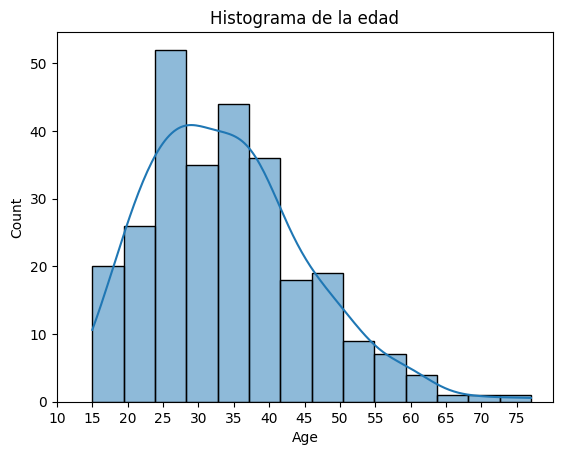

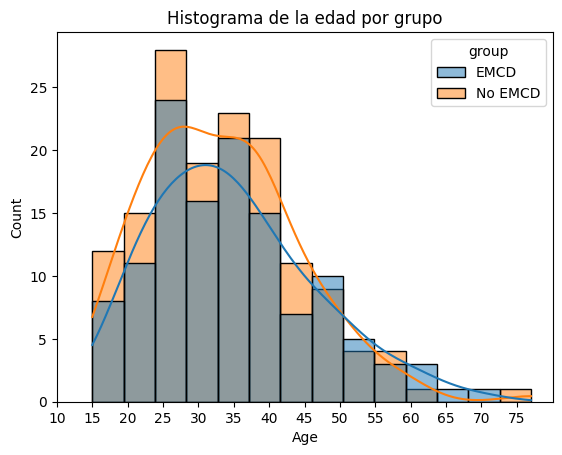

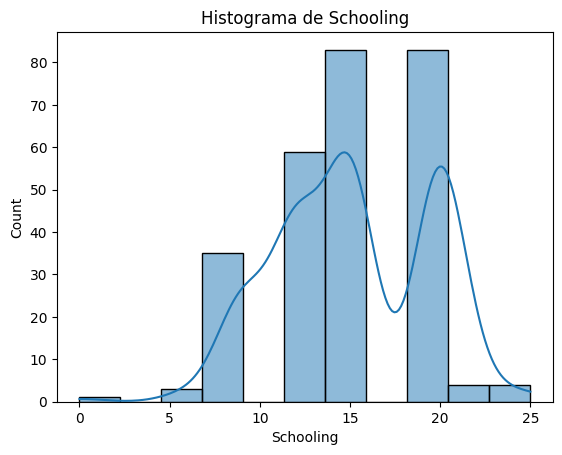

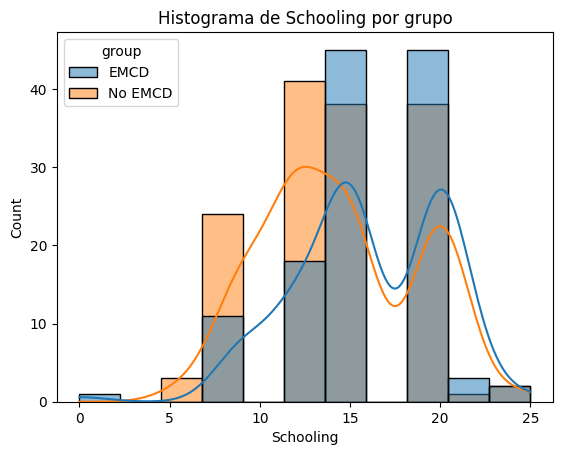

In [7]:
# Histograma de la edad
sns.histplot(dataset["Age"], kde=True)
plt.xticks(np.arange(10, 80, 5))
plt.title("Histograma de la edad")
plt.show()

# Histograma de la edad por grupo
sns.histplot(dataset, x="Age", hue="group", kde=True)
plt.xticks(np.arange(10, 80, 5))
plt.title("Histograma de la edad por grupo")
plt.show()

# Histograma de tiempo en la escuela
sns.histplot(dataset["Schooling"], kde=True)
plt.title("Histograma de Schooling")
plt.show()

# Histograma de tiempo en la escuela por grupo
sns.histplot(dataset, x="Schooling", hue="group", kde=True)
plt.title("Histograma de Schooling por grupo")
plt.show()

-   Datos Categoricos


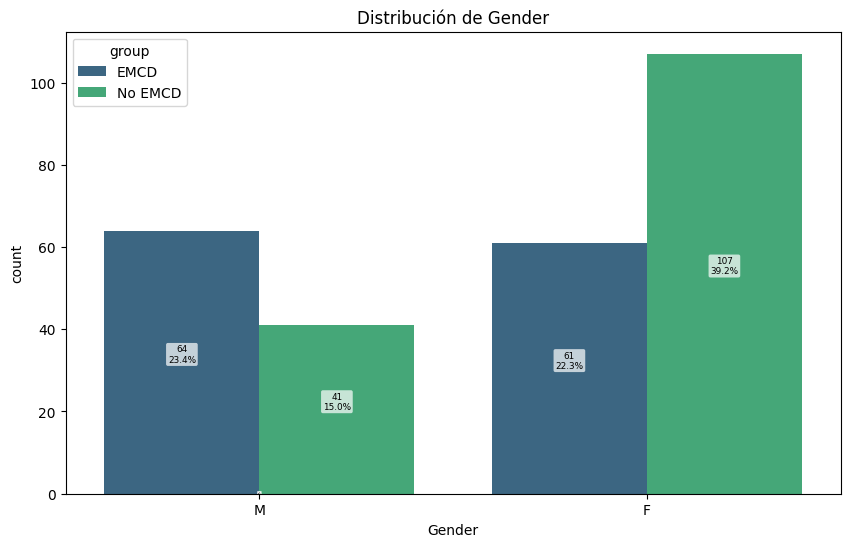

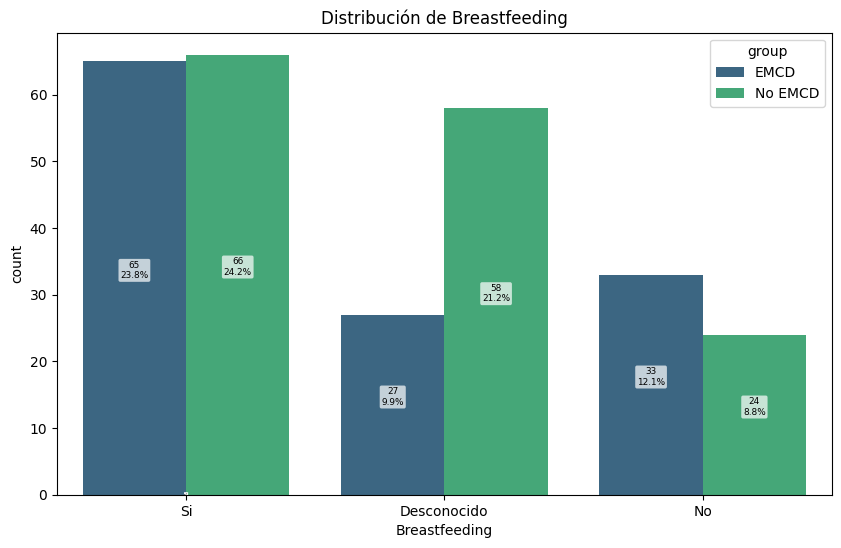

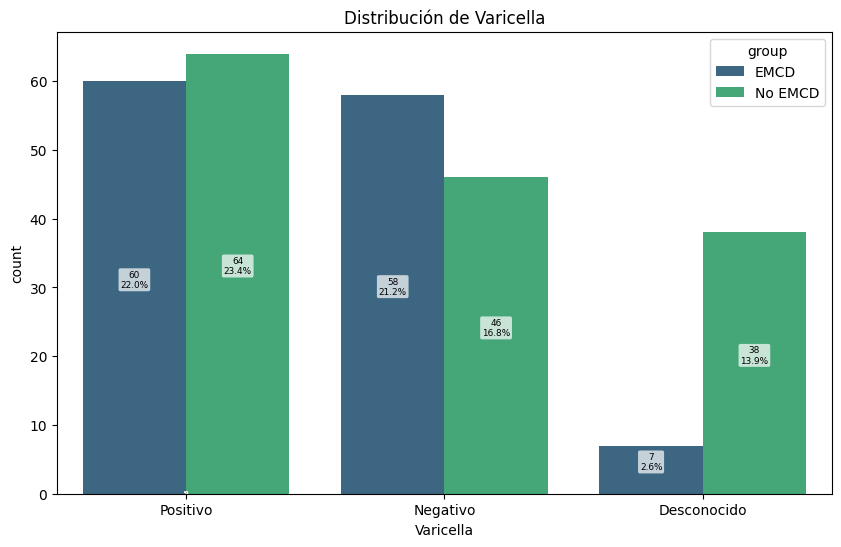

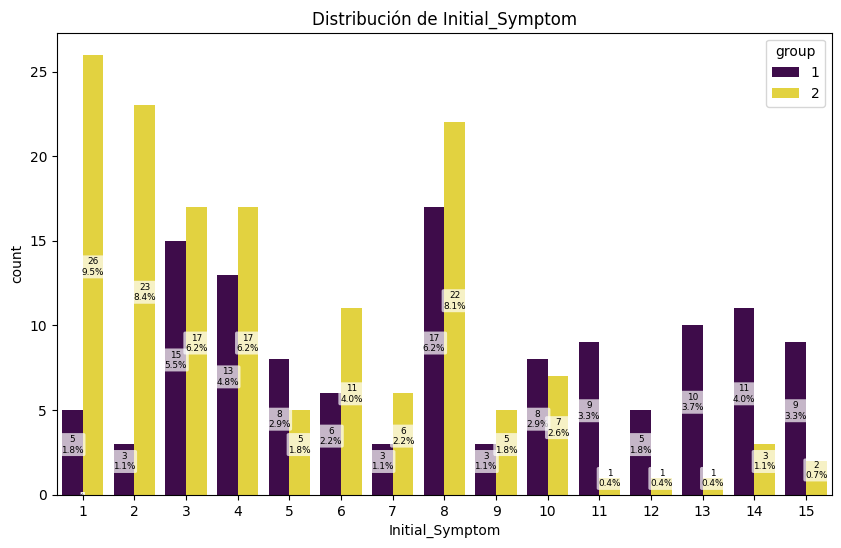

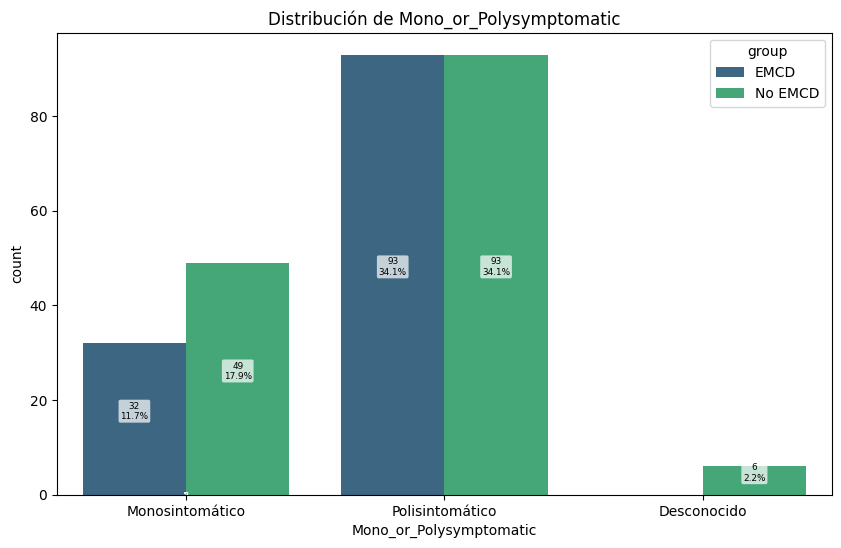

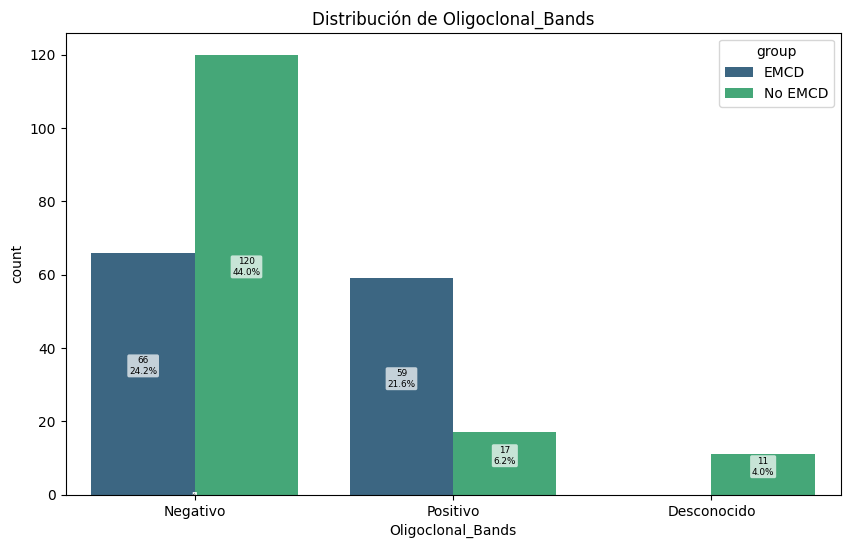

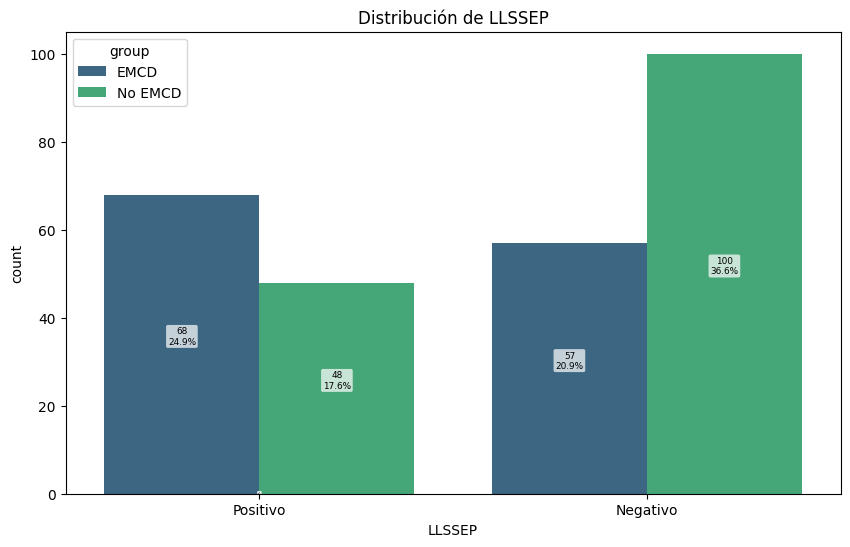

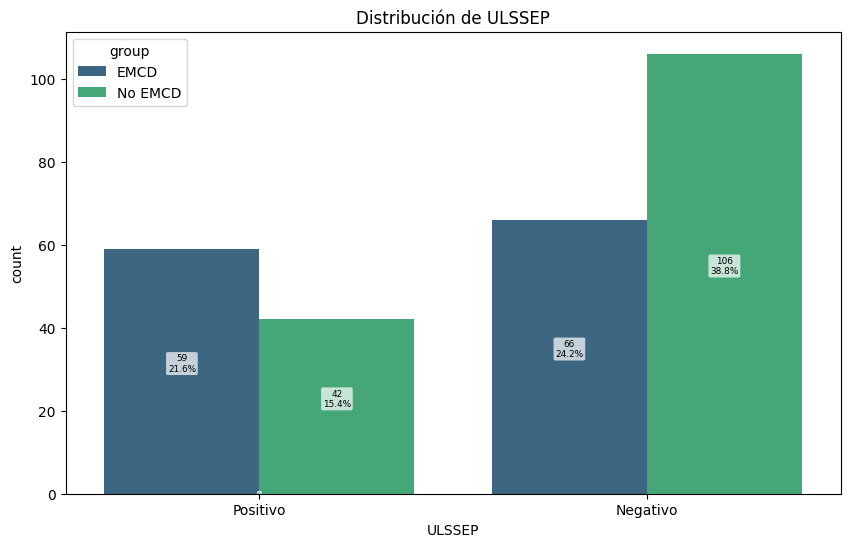

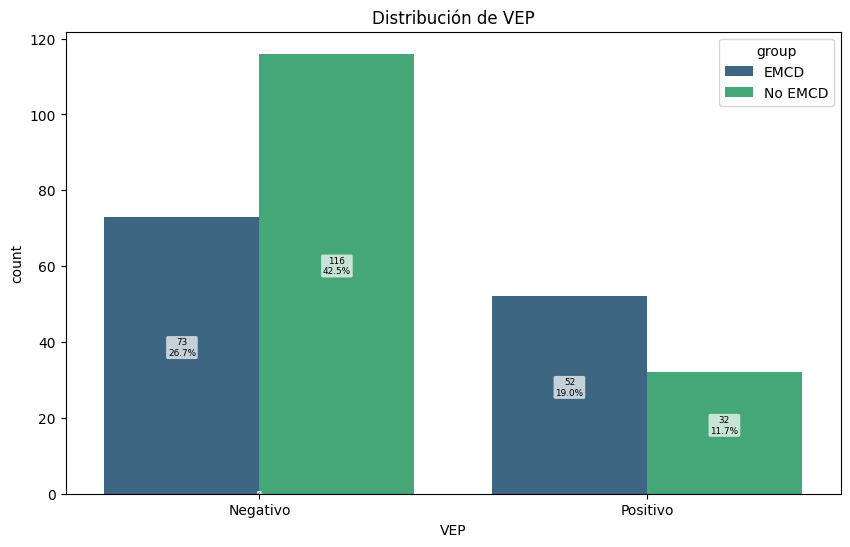

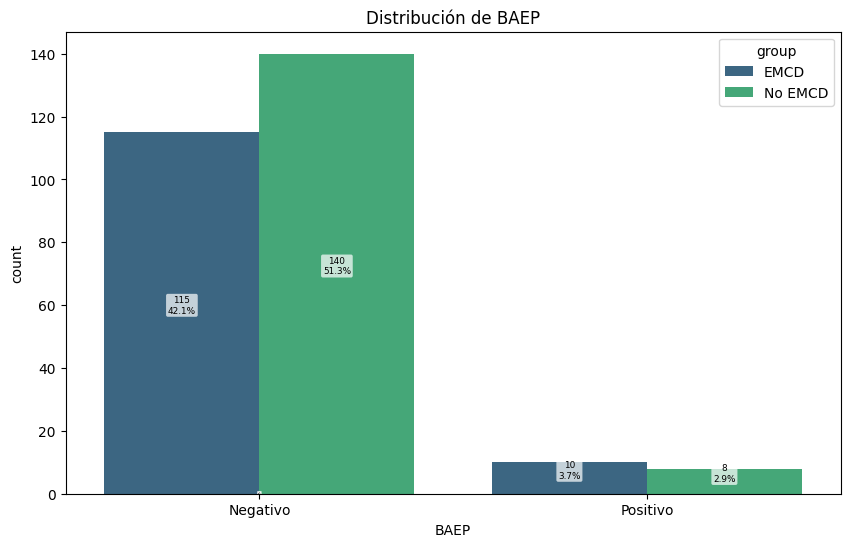

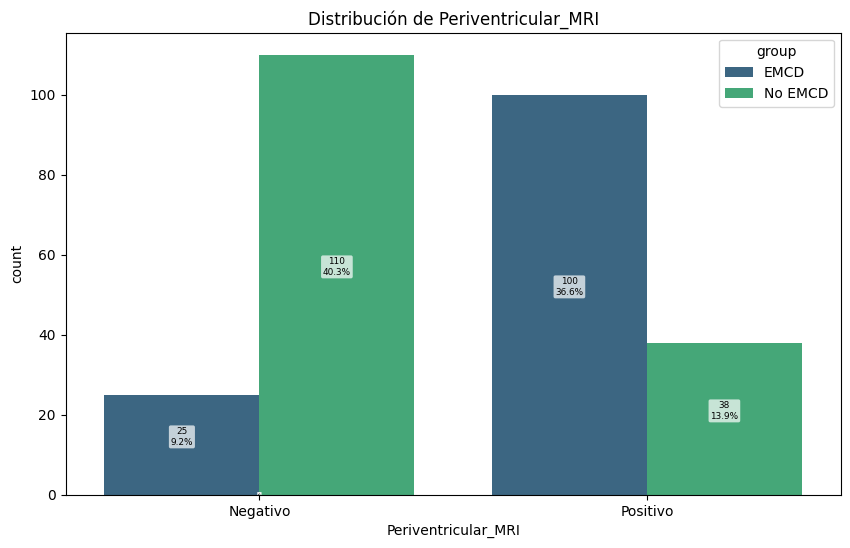

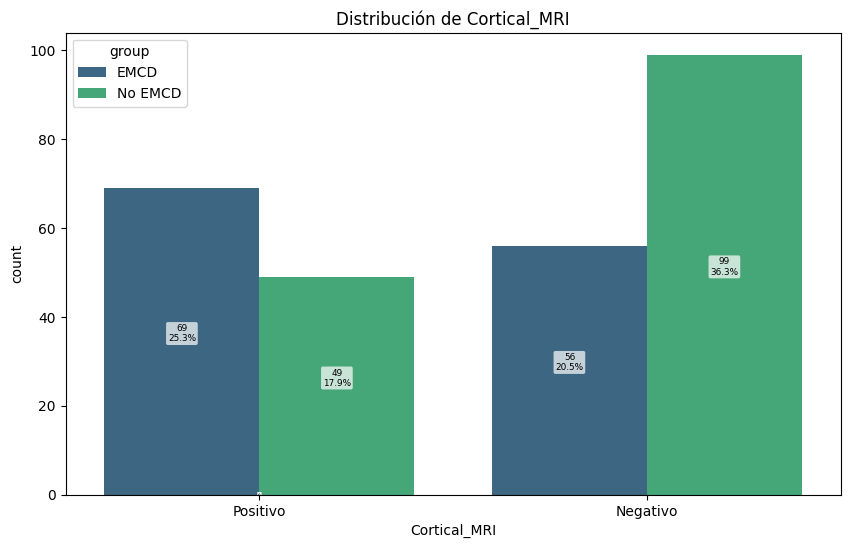

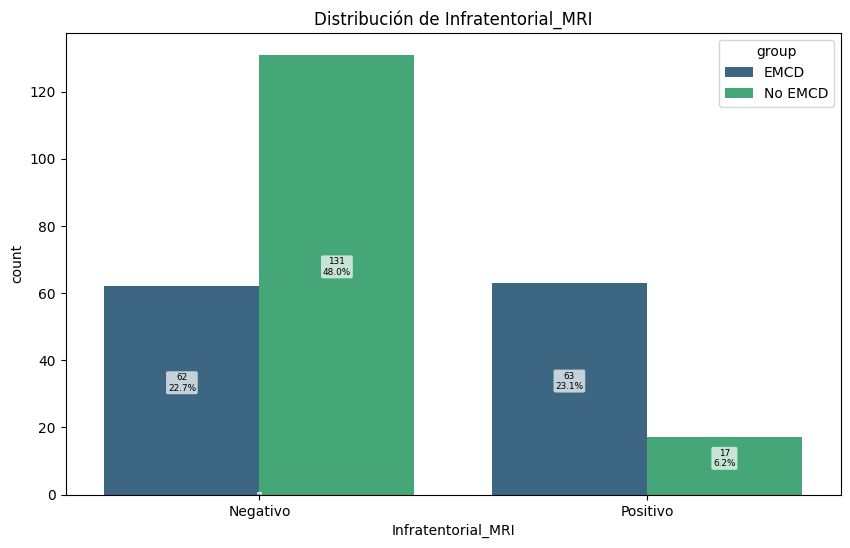

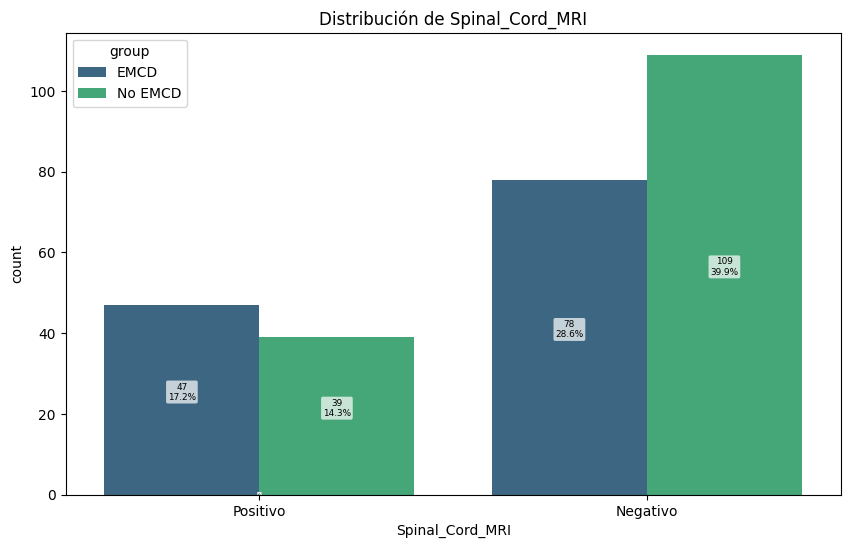

In [8]:

variables_categoricas = ["Gender", "Breastfeeding", "Varicella", "Initial_Symptom", "Mono_or_Polysymptomatic", "Oligoclonal_Bands",
                         "LLSSEP", "ULSSEP", "VEP", "BAEP", "Periventricular_MRI", "Cortical_MRI", "Infratentorial_MRI", "Spinal_Cord_MRI"]


def plot_frecuency(dataset, var):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=var, data=dataset,
                       stat="count", palette="viridis", hue="group")
    plt.title(f"Distribución de {var}")
    total = float(len(dataset))
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2),
                y=height - height/2,
                s=f'{height:.0f}\n{height/total:.1%}',
                ha='center',
                fontdict={'size': p.get_width()*16},
                bbox=dict(facecolor='white', alpha=0.7, boxstyle="round,pad=0.2", edgecolor="none"))
    plt.show()


for var in variables_categoricas:
    plot_frecuency(
        dataset if var != "Initial_Symptom" else original_dataset, var)

# Estadistica Inferencial


In [9]:
original_dataset = original_dataset.drop(
    ["Initial_EDSS", "Final_EDSS"], axis=1)
original_dataset = original_dataset.fillna(
    np.floor(original_dataset.Schooling.mean()), axis=0)
original_dataset = original_dataset.fillna(
    np.floor(original_dataset.Initial_Symptom.mean()), axis=0)
emcd_dataset = original_dataset[original_dataset["group"] == 1]
no_emcd_dataset = original_dataset[original_dataset["group"] == 2]

-   Pruebas estadisticas para las variables numericas


    -   H0: No existe una diferencia significativa en las medianas de la variable numerica entre los pacientes que desarrollaron EM y los que no.
    -   HA: Existe una diferencia significativa en las medianas de la variable numerica entre los pacientes que desarrollaron EM y los que no.


In [10]:
shapiro_age_emcd = stats.shapiro(emcd_dataset["Age"])
shapiro_age_no_emcd = stats.shapiro(no_emcd_dataset["Age"])

print(f"Grupo 1: Estadístico={
      shapiro_age_emcd[0]}, p-valor={shapiro_age_emcd[1]}")
print(f"Grupo 2: Estadístico={
      shapiro_age_no_emcd[0]}, p-valor={shapiro_age_no_emcd[1]}")

Grupo 1: Estadístico=0.96340357305532, p-valor=0.0018408925111862025
Grupo 2: Estadístico=0.9626819451568045, p-valor=0.0004825821684869188


In [11]:
num_results = []

Dado que no se cumple el principio de normalidad de los grupos a evaluar, se utilizara la prueba de Mann-Whitney U para comparar la mediana de el grupo con EMCD y el grupo sin EMCD, para la edad.


In [12]:
u_stat, p_val = stats.mannwhitneyu(
    emcd_dataset["Age"], no_emcd_dataset["Age"], alternative="two-sided")
print(f"u-statistic: {u_stat}\np-value: {p_val}")
num_results.append(
    {"Variable": "Age", "u-statistic": u_stat, "p-value": p_val})

u-statistic: 9834.5
p-value: 0.3686204128773479


Se falla en rechazar la hipotesis nula, dado que el p-value es mayor a 0.05, entonces no hay una diferencia significativa en las medianas de las edades entre el grupo con EMCD y sin EMCD. Por lo tanto, no se puede afirmar que la edad sea un factor determinante para la presencia de EMCD.


In [13]:
shapiro_age_emcd = stats.shapiro(emcd_dataset["Schooling"])
shapiro_age_no_emcd = stats.shapiro(no_emcd_dataset["Schooling"])

print(f"Grupo 1: Estadístico={
      shapiro_age_emcd[0]}, p-valor={shapiro_age_emcd[1]}")
print(f"Grupo 2: Estadístico={
      shapiro_age_no_emcd[0]}, p-valor={shapiro_age_no_emcd[1]}")

Grupo 1: Estadístico=0.8825681977222231, p-valor=1.6754719697503604e-08
Grupo 2: Estadístico=0.9051012662062896, p-valor=3.065798387129227e-08


Dado que no se cumple el principio de normalidad de los grupos a evaluar, se utilizara la prueba de Mann-Whitney U para comparar la mediana de el grupo con EMCD y el grupo sin EMCD


In [14]:
u_stat, p_val = stats.mannwhitneyu(
    emcd_dataset["Schooling"], no_emcd_dataset["Schooling"], alternative="two-sided")
print(f"u-statistic: {u_stat}\np-value: {p_val}")
num_results.append(
    {"Variable": "Schooling", "u-statistic": u_stat, "p-value": p_val})

u-statistic: 11366.0
p-value: 0.0007511932770154087


Se rechaza la hipotesis nula en favor de la alternativa con una confianza del 95%, dado que el p-value es mayor a 0.05, entonces hay una diferencia significativa en las medianas en la escolaridad entre el grupo con EMCD y sin EMCD. Por lo tanto, se puede afirmar que la escolaridad es un factor determinante para la presencia de EMCD.


#### Resumen de las pruebas estadisticas para las variables numericas


In [15]:
num_results = pd.DataFrame(num_results)
num_results

,Variable,u-statistic,p-value
0,Age,9834.5,0.368620
1,Schooling,11366.0,0.000751


-   Pruebas estadisticas para variables categoricas


    - H0: No existe relacion entre la variable categorica y el desarrollo de EMCD
    - HA: Existe relacion entre la variable categorica y el desarrollo de EMCD


In [16]:
variables_categoricas = ["Gender", "Breastfeeding", "Varicella", "Initial_Symptom", "Mono_or_Polysymptomatic", "Oligoclonal_Bands",
                         "LLSSEP", "ULSSEP", "VEP", "BAEP", "Periventricular_MRI", "Cortical_MRI", "Infratentorial_MRI", "Spinal_Cord_MRI"]

# Generacion de tablas de contingencia
results = []
tables = []

for var in variables_categoricas:
    table = pd.crosstab(original_dataset[var], original_dataset["group"])
    tables.append({"variable": var, "table": table})
    if (table.shape[0] == 2 and table.shape[1] == 2):
        odds_ratio, p_value = stats.fisher_exact(table)
        est = odds_ratio
        dof = 1
        test = "Fisher"
    else:
        chi2, p_value, dof, expected = stats.chi2_contingency(table)
        est = chi2
        test = "Chi2"
    results.append({"variable": var, "prueba": test,
                    "Chi2 / odds ratio": est, "p-value": p_value, "dof": dof,
                    "<0.05": "*" if p_value < 0.05 else "",
                    "<0.01": "*" if p_value < 0.01 else ""})

results = pd.DataFrame(results)
results

,variable,prueba,Chi2 / odds ratio,p-value,dof,<0.05,<0.01
0,Gender,Fisher,2.738105,1.002996e-04,1,*,*
1,Breastfeeding,Chi2,10.874022,4.352472e-03,2,*,*
2,Varicella,Chi2,21.081106,2.644210e-05,2,*,*
3,Initial_Symptom,Chi2,57.108698,3.745727e-07,14,*,*
4,Mono_or_Polysymptomatic,Chi2,7.684718,2.144296e-02,2,*,
5,Oligoclonal_Bands,Chi2,48.292996,3.260687e-11,2,*,*
6,LLSSEP,Fisher,0.402353,3.491561e-04,1,*,*
7,ULSSEP,Fisher,0.443236,1.637113e-03,1,*,*
8,VEP,Fisher,0.387268,5.783209e-04,1,*,*
9,BAEP,Fisher,0.657143,4.660641e-01,1,,


Según la tabla obtenida se identifica lo siguiente:

-   Las variables BAEP y Spinal_Cod_MRI tienen un p-value mayor a 0.05, por lo que se falla en rechazar la hipotesis nula, es decir, no existe relacion significativa entre estas variables y la presencia de EMCD.

-   Por el contrario, las variables Gender, Breastfeeding, Varicella, Initial_Symptoms, Mono_or_Polysymptomatic, Oligoclonal_Bands, LLSSEP, ULSSEP, VEP, Periventicular_MRI, Cortical_MRI e Infratentorial_MRI, presentan un p-value menor a 0.05, por lo que se rechaza la hipotesis nula en favor de la hipotesis alternativa, es decir, existe relacion significativa entre estas variables y la presencia de EMCD.


## Modelo de Regresion Logistica


Se revisara la multicolinealidad entre las variables presentes, para ello se utilizara el factor de inflacion de la varianza (VIF) y se eliminaran las variables con un VIF alto.


In [17]:
def calc_vif(data):
    data = data.astype(float)
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(
        data.values, i) for i in range(data.shape[1])]

    return (vif)


vif_data = original_dataset.drop(["group"], axis=1)

calc_vif(vif_data)

,variables,VIF
0,Gender,11.078608
1,Age,10.365358
2,Schooling,10.229228
3,Breastfeeding,8.447405
4,Varicella,10.732168
5,Initial_Symptom,5.828877
6,Mono_or_Polysymptomatic,16.814315
7,Oligoclonal_Bands,1.493597
8,LLSSEP,3.185688
9,ULSSEP,2.692422


Dado el VIF obtenido de las variables, se eliminaran las variables con VIF mayor 10 en primera instancia: Gender, Age, Schooling, Varicella y Mono_or_Polysymptomatic


In [18]:
variables_descartadas = ["Gender", "Age", "Schooling",
                         "Varicella", "Mono_or_Polysymptomatic"]
model_dataset = original_dataset.copy()
model_dataset = model_dataset.drop(variables_descartadas, axis=1)

In [19]:
vif_data = model_dataset.drop("group", axis=1)
calc_vif(vif_data)

,variables,VIF
0,Breastfeeding,2.781836
1,Initial_Symptom,3.856742
2,Oligoclonal_Bands,1.462914
3,LLSSEP,3.100976
4,ULSSEP,2.636880
5,VEP,1.835167
6,BAEP,1.174750
7,Periventricular_MRI,2.619021
8,Cortical_MRI,1.929724
9,Infratentorial_MRI,1.667374


Ahora no existen variables con un VIF preocupante, por lo tanto se procedera a generar y evaluar el modelo


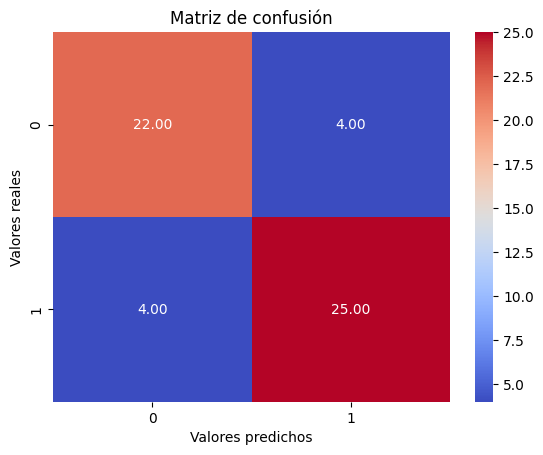

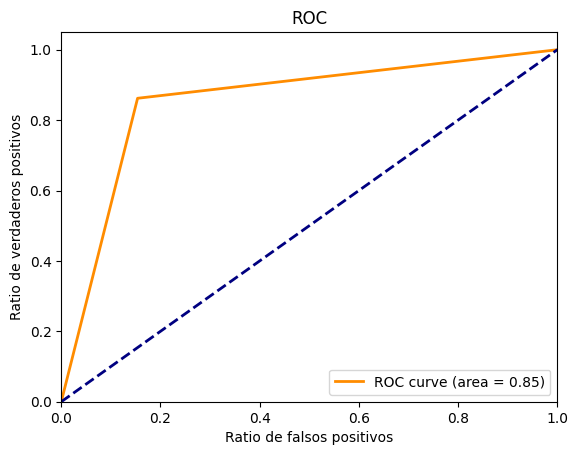

AUC:  0.8541114058355437
              precision    recall  f1-score   support

         1.0       0.85      0.85      0.85        26
         2.0       0.86      0.86      0.86        29

    accuracy                           0.85        55
   macro avg       0.85      0.85      0.85        55
weighted avg       0.85      0.85      0.85        55



In [20]:
# Preparacion de datos para el modelo
variables_descartadas = ["Gender", "Age", "Schooling",
                         "Varicella", "Mono_or_Polysymptomatic"]
model_dataset = original_dataset.copy()
model_dataset = model_dataset.drop(variables_descartadas, axis=1)
X = model_dataset.drop("group", axis=1)
y = model_dataset["group"]

X_train, X_valid, y_train, y_valid = train_test_split(


    X, y, test_size=0.2, random_state=41)

logreg_model = LogisticRegression(solver='liblinear')


logreg_model.fit(X_train, y_train)

# Metricas con datos de validacion
y_pred = logreg_model.predict(X_valid)

# Matriz de confusion
sns.heatmap(confusion_matrix(y_valid, y_pred),


            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de confusión")
plt.ylabel("Valores reales")
plt.xlabel("Valores predichos")
plt.show()


# ROC y AUC
y_valid_bin = y_valid - 1
y_pred_bin = y_pred - 1

fpr, tpr, thresholds = roc_curve(y_valid_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
print("AUC: ", roc_auc)

print(classification_report(y_valid, y_pred))